# Comparison Notebook for Best Hyperparameters
- NN, Polynomial, SVGP

In [1]:
import pandas as pd 
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
plt.style.use(plt.style.available[24])
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the xtick labels
plt.rc('ytick', labelsize=12)     # fontsize of the ytick labels (also applies to colorbar)
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=16)   # fontsize of the figure title
plt.rc('axes', titlesize=14)
plt.rc('lines', linewidth=2)     # line width
plt.rc('figure', figsize=(6, 5)) # figure size
plt.rc('axes', axisbelow=True)

## Neural Network
Varied the following hyperparameters
- Patience
- Batch Size
- Number of Hidden Layers
- Number of Neurons per Layer
- Learning Rate
- Exponential Learning Rate Decay Parameter (Gamma)
From preliminary analysis, we decided to use a `torch.nn.LeakyReLU` activation function and `torch.optim.Adam` optimizer

In [2]:
ids = [2]
df = None
for id in ids:
    if df is None:
        df = pd.read_csv(f'results/nn_noise_10_{id}/grid_search_results.csv')
        df['category'] = f'nn{id}'
    else:
        temp = pd.read_csv(f'results/nn_noise_10_{id}/grid_search_results.csv')
        temp['category'] = f'nn{id}'
        df = pd.concat([df, temp], ignore_index=True)

df.drop(columns=['mean_score_time', 'std_score_time', 'param_module__activation', 'param_optimizer', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score'], inplace=True)
df['patience'] = df['param_callbacks__early_stopping__patience']
df['batch_size'] = df['param_batch_size']
df['gamma'] = df['param_callbacks__lr_scheduler__gamma']
df['lr'] = df['param_optimizer__lr']
df['n_hidden'] = df['param_module__n_hidden'].astype(int)
df['n_neurons'] = df['param_module__n_neurons'].astype(int)
df.drop(columns=['param_callbacks__early_stopping__patience', 'param_batch_size', 'param_optimizer__lr', 'param_callbacks__lr_scheduler__gamma', 'param_module__n_hidden', 'param_module__n_neurons'], inplace=True)
display(df)

,mean_fit_time,std_fit_time,mean_test_score,std_test_score,rank_test_score,category,patience,batch_size,gamma,lr,n_hidden,n_neurons
0,167.713428,51.284725,-0.000194,0.000003,6,nn2,5,8192,0.80,0.01,12,64
1,120.241407,30.402914,-0.000203,0.000009,8,nn2,5,8192,0.85,0.01,12,64
2,124.929759,26.168550,-0.000240,0.000018,12,nn2,5,8192,0.90,0.01,12,64
3,223.952062,20.191087,-0.000194,0.000003,7,nn2,7,8192,0.80,0.01,12,64
4,280.584766,19.410409,-0.000183,0.000002,2,nn2,7,8192,0.85,0.01,12,64
5,220.055524,68.480463,-0.000191,0.000014,5,nn2,7,8192,0.90,0.01,12,64
6,275.552404,14.855792,-0.000186,0.000003,4,nn2,10,8192,0.80,0.01,12,64
7,295.605778,0.280140,-0.000185,0.000001,3,nn2,10,8192,0.85,0.01,12,64
8,296.043777,0.073199,-0.000175,0.000003,1,nn2,10,8192,0.90,0.01,12,64
9,271.879216,12.982264,-0.000292,0.000014,18,nn2,5,32768,0.80,0.01,12,64


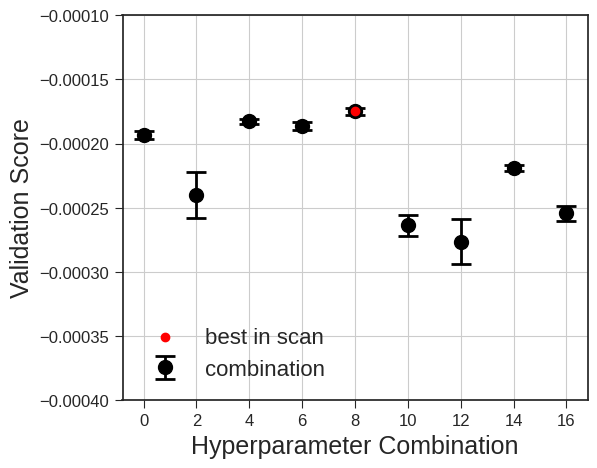

In [10]:
df_subset = df[(df['mean_test_score'] > -0.0003) & (df.index % 2 ==0)]
df_best = df[(df['rank_test_score'] == 1)]
df_bestest = df[df['mean_test_score'] > -0.00017]
fig, ax = plt.subplots(figsize=(6, 5))
ax.grid(True)
ax.errorbar(df_subset.index, df_subset['mean_test_score'], yerr=df_subset['std_test_score'], fmt='o', label='combination', color='k', capsize=7, capthick=2, markersize=10)
ax.scatter(df_best.index, df_best['mean_test_score'], label='best in scan', color='r', zorder=100)
#ax.scatter(df_bestest.index, df_bestest['mean_test_score'], label='best overall', color='b')
# ax.vlines([17.5, 35.5, 41.5], ymin=-0.0004, ymax=0, color='gray', linestyles='dotted')
ax.set_ylabel('Validation Score', fontsize=18)
ax.set_xlabel('Hyperparameter Combination', fontsize=18)
ax.set_ylim(-0.0004, -0.0001)
# ax.set_xlim(-0.5, 47)
# ax.text(9, -0.00015, '1', fontsize=12)
# ax.text(7, -0.000125, '4x256', fontsize=12, color='red')
# ax.text(26, -0.00015, '2', fontsize=12)
# ax.text(24, -0.000125, '12x64', fontsize=12, color='red')
# ax.text(38, -0.00015, '3', fontsize=12)
# ax.text(45, -0.00015, '4', fontsize=12)
# ax.text(42, -0.000125, '8x128', fontsize=12, color='red')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc='lower left', fontsize=16)
fig.savefig('figures/nn_hp_search.eps', format='eps', bbox_inches='tight')

## Polynomial Ridge Comparison
- Tested degrees 1-7 and varied the $\alpha$ regularization parameter of the ridge regression from $10^3$ down to $10^{-3}$

In [4]:
df_poly = pd.read_csv('results/ridge_noise_10/grid_search_results.csv')
df_poly.drop(columns=['params', 'Unnamed: 0', 'mean_score_time', 'std_score_time', 'std_score_time', 'split0_test_score', 'split1_test_score', 'split2_test_score'], inplace=True)
display(df_poly)

,mean_fit_time,std_fit_time,param_poly__degree,param_ridge__alpha,mean_test_score,std_test_score,rank_test_score
0,0.345004,0.200658,1,0.001,-0.013946,4.935134e-05,60
1,0.186031,0.001905,1,0.010,-0.013946,4.935111e-05,58
2,0.217686,0.009842,1,0.100,-0.013946,4.935088e-05,61
3,0.253217,0.012768,1,1.000,-0.013946,4.935117e-05,58
4,0.254241,0.018242,1,10.000,-0.013946,4.934527e-05,57
5,0.292865,0.010244,1,100.000,-0.013946,4.938877e-05,62
6,0.288629,0.015693,1,1000.000,-0.013948,4.946061e-05,63
7,0.536828,0.052931,2,0.001,-0.009918,3.511778e-05,51
8,0.532160,0.013356,2,0.010,-0.009918,3.511668e-05,52
9,0.577975,0.037143,2,0.100,-0.009918,3.511638e-05,50


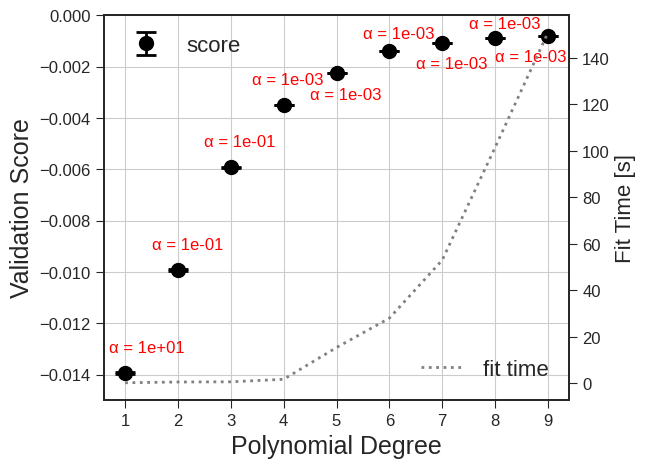

In [42]:
df_unique = df_poly.loc[df_poly.groupby('param_poly__degree')['mean_test_score'].idxmax()]
fig, ax = plt.subplots(figsize=(6, 5))
ax.errorbar(df_unique['param_poly__degree'], df_unique['mean_test_score'], yerr=df_unique['std_test_score'], fmt='o', label='score', color='k', capsize=7, capthick=2, markersize=10)
ax.scatter(df_unique['param_poly__degree'], df_unique['mean_test_score'], color='k', s=75)
ax2 = ax.twinx()
ax2.grid(False)
ax.grid(True)
ax2.set_ylabel('Fit Time [s]', fontsize=16)
ax2.plot(df_unique['param_poly__degree'], df_unique['mean_fit_time'], label='fit time', color='gray', linestyle='dotted')
x_shifts = [-0.3, -0.5, -0.5, -0.6, -0.5, -0.5, -0.5, -0.5, -1]
y_shifts = [0.0008, 0.0008, 0.0008, 0.0008, -0.001, 0.0005, -0.001, 0.0004, -0.001]
for i in range(df_unique.shape[0]):
    flag = -1 if i > 4 else 1
    ax.text(df_unique['param_poly__degree'].values[i] + x_shifts[i], df_unique['mean_test_score'].values[i] + y_shifts[i], f'α = {df_unique["param_ridge__alpha"].values[i]:.0e}', fontsize=12, color='red')
#ax.text(1, -0.001, df_unique[df_unique['param_poly__degree'] == 1]['param_ridge__alpha'].values[0], label='best in scan', color='r')
ax.legend(loc='upper left', fontsize=16)
ax2.legend(loc='lower right', fontsize=16)
ax.set_xlabel('Polynomial Degree', fontsize=18)
ax.set_ylabel('Validation Score', fontsize=18)
ax.set_ylim(-0.015, 0)
ax.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
fig.savefig('figures/poly_hp_search.eps', format='eps', bbox_inches='tight')

## SVGP
- Too computationally expense to do a comprehensive grid scan like the NN
    + But we did do a grid search for a few hyperparameters in the past (not shown here)
- We found that 8 latent variables and 2000 inducing points works well
    + More inducing points would make training infeasible

In [39]:
df_svgp = pd.read_csv('results/svgp_noise_10/grid_search_results.csv')
df_svgp.drop(columns=['params', 'std_score_time', 'mean_score_time', 'std_fit_time', 'param_module__inducing_points', 'rank_test_score'], inplace=True)
df_svgp.head()

,mean_fit_time,param_module__num_latents,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score
0,2079.771153,8,-0.000302,-0.00033,-0.000359,-0.00033,0.000023


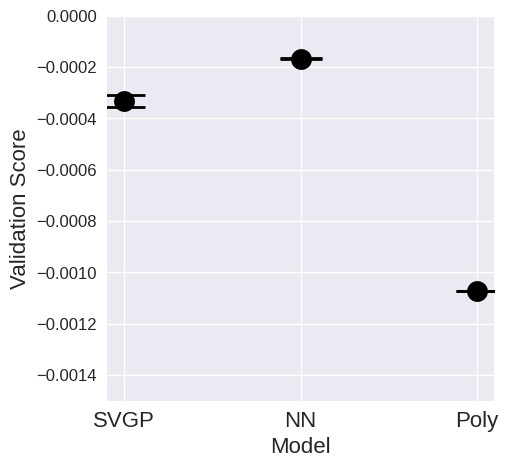

In [50]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.errorbar(0, df_svgp['mean_test_score'], yerr=df_svgp['std_test_score'], fmt='o', label='validation score', color='k', capsize=15, capthick=2, markersize=15)
ax.errorbar(1, df_bestest['mean_test_score'], yerr=df_bestest['std_test_score'], fmt='o', label='best overall', color='k', capsize=15, capthick=2, markersize=15)
ax.errorbar(2, df_unique['mean_test_score'].values[6], yerr=df_unique['std_test_score'].values[6], label='best poly', color='k', fmt='o', capsize=15, capthick=2, markersize=15)
ax.set_ylabel('Validation Score', fontsize=16)
ax.set_xlabel('Model', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['SVGP', 'NN', 'Poly'], fontsize=16)
ax.set_ylim(-0.0015, 0)
fig.savefig('figures/model_comparison.eps', format='eps', bbox_inches='tight')

In [48]:
df_unique

,mean_fit_time,std_fit_time,param_poly__degree,param_ridge__alpha,mean_test_score,std_test_score,rank_test_score
4,0.254241,0.018242,1,10.000,-0.013946,4.934527e-05,57
9,0.577975,0.037143,2,0.100,-0.009918,3.511638e-05,50
16,0.656712,0.007199,3,0.100,-0.005919,1.552024e-05,42
21,1.743101,0.027310,4,0.001,-0.003492,7.931917e-06,29
28,15.399441,0.109899,5,0.001,-0.002265,1.738768e-06,19
35,28.017727,0.804288,6,0.001,-0.001380,1.620677e-06,9
42,52.973502,11.230024,7,0.001,-0.001072,1.356433e-06,5
49,101.393873,5.448850,8,0.001,-0.000902,7.767605e-07,2
56,150.783015,4.343295,9,0.001,-0.000807,9.445569e-07,1


In [59]:
from sklearn.metrics import mean_absolute_percentage_error as mape, mean_squared_error as mse
import numpy as np
x = np.array([[1, 1e6, .5], [1.1, 1.5e6, .4], [0.5, 1e5, 0.2], [2, 4e6, 0.8]])
y = np.array([[1.1, 1.4e6, .6], [0.9, 1.1e6, .6], [0.3, 2e5, 0.15], [2.1, 3.5e6, 0.82]])
print(mape(x, y))
print(mape(x, y, multioutput='raw_values')*100)
print(mse(x, y))
print(mse(x, y, multioutput='raw_values'))

0.2915404040404041
[18.29545455 44.79166667 24.375     ]
48333333333.34607
[2.5000e-02 1.4500e+11 1.3225e-02]
